In [4]:
# !pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

In [5]:
# 1. LOAD DATA
# Using the path defined in your DataIngestion component
DATA_PATH = os.path.join('..', 'artifacts', 'reviews_raw.csv')
df = pd.read_csv(DATA_PATH)

# 2. BASIC OVERVIEW
print(f"Dataset Shape: {df.shape}")
print(df.info())
print(df.head())

Dataset Shape: (5000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_body       5000 non-null   object
 1   stars             5000 non-null   int64 
 2   product_category  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB
None
                                         review_body  stars product_category
0  This spray is really nice. It smells really go...      5       All_Beauty
1  This product does what I need it to do, I just...      4       All_Beauty
2                          Smells good, feels great!      5       All_Beauty
3                                     Felt synthetic      1       All_Beauty
4                                            Love it      5       All_Beauty


C:\Users\HP\AppData\Local\Temp\ipykernel_28896\2549729371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis')


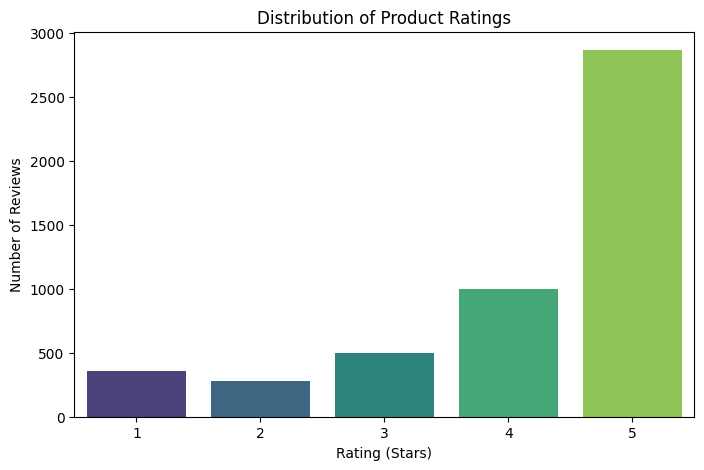

In [6]:
# 3. RATING DISTRIBUTION (Sentiment Balance)
# Essential to see if the model will be biased towards positive reviews
plt.figure(figsize=(8, 5))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.show()

In [7]:
# 4. REVIEW LENGTH ANALYSIS (Tokenization Prep)
# Crucial for setting 'max_length' in Hugging Face Tokenizer
df['review_length'] = df['review_body'].apply(lambda x: len(str(x).split()))

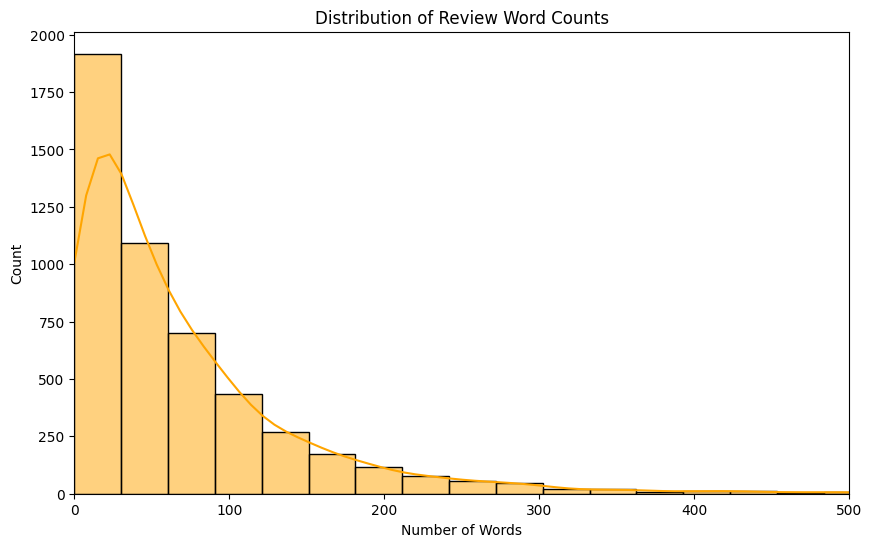

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Number of Words')
plt.xlim(0, 500) # Zooming in on the common range
plt.show()

In [9]:

print(f"Average Review Length: {df['review_length'].mean():.2f} words")
print(f"95th Percentile Length: {df['review_length'].quantile(0.95):.2f} words")

# 5. TEXT CONTENT EXPLORATION (Word Cloud)
text_combined = " ".join(review for review in df['review_body'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='magma', max_words=100).generate(text_combined)


Average Review Length: 71.43 words
95th Percentile Length: 227.00 words


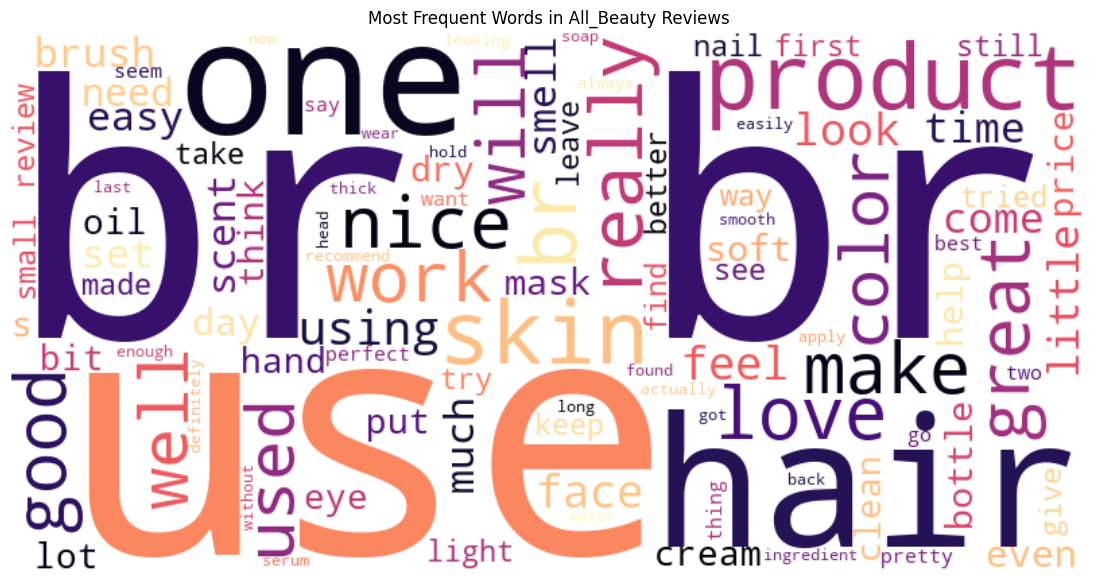

In [10]:

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in All_Beauty Reviews')
plt.show()